# PCA et aide à l'interprétation

## I. Import Modules, configs

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.float_format', lambda x: '%.3f' % x) #round float

## II. Import dataset

In [3]:
df = pd.read_excel('/work/cars.xls', index_col='Modele')

## III. Data analysis

In [4]:
df = df.drop(['PRIX', 'FINITION', 'R-POID.PUIS'], axis=1)

In [5]:
df.shape

(18, 6)

In [6]:
# Number of observations
n = df.shape[0]

In [7]:
# Number of variables
p = df.shape[1]

In [8]:
# Frist look at the data
df.head()

,CYL,PUISS,LONG,LARG,POIDS,V-MAX
Modele,,,,,,
Alfasud TI,1350,79,393,161,870,165
Audi 100,1588,85,468,177,1110,160
Simca 1300,1294,68,424,168,1050,152
Citroen GS Club,1222,59,412,161,930,151
Fiat 132,1585,98,439,164,1105,165


In [9]:
# Check data types
df.dtypes

CYL      int64
PUISS    int64
LONG     int64
LARG     int64
POIDS    int64
V-MAX    int64
dtype: object

In [10]:
df_copy = df.copy()
df_copy.head()

,CYL,PUISS,LONG,LARG,POIDS,V-MAX
Modele,,,,,,
Alfasud TI,1350,79,393,161,870,165
Audi 100,1588,85,468,177,1110,160
Simca 1300,1294,68,424,168,1050,152
Citroen GS Club,1222,59,412,161,930,151
Fiat 132,1585,98,439,164,1105,165


## III. Data preprocessing

### III.1 Standardization

To be able to achieve a APC, we have to use StandardScalar from scikit-learn so all our numeric variables are centered and normalized (following a gaussian law).

**Numeric columns**

In [11]:
num_cols = df_copy.select_dtypes(include=['int64']).columns
print(num_cols)

Index(['CYL', 'PUISS', 'LONG', 'LARG', 'POIDS', 'V-MAX'], dtype='object')


In [12]:
# Import StandarScalar class from scitkit-learn
from sklearn.preprocessing import StandardScaler

# Instanciation
scalar = StandardScaler()

# Transformation
df_copy[num_cols] = scalar.fit_transform(df_copy[num_cols])
print(df)

                  CYL  PUISS  LONG  LARG  POIDS  V-MAX
Modele                                                
Alfasud TI       1350     79   393   161    870    165
Audi 100         1588     85   468   177   1110    160
Simca 1300       1294     68   424   168   1050    152
Citroen GS Club  1222     59   412   161    930    151
Fiat 132         1585     98   439   164   1105    165
Lancia Beta      1297     82   429   169   1080    160
Peugeot 504      1796     79   449   169   1160    154
Renault 16 TL    1565     55   424   163   1010    140
Renault 30       2664    128   452   173   1320    180
Toyota Corolla   1166     55   399   157    815    140
Alfetta-1.66     1570    109   428   162   1060    175
Princess-1800    1798     82   445   172   1160    158
Datsun-200L      1998    115   469   169   1370    160
Taunus-2000      1993     98   438   170   1080    167
Rancho           1442     80   431   166   1129    144
Mazda-9295       1769     83   440   165   1095    165
Opel-Rekor

Let's check if our scaled numeric variables got a mean equal to 0 or close to 0.

**Mean**

In [13]:
print(np.mean(df_copy[num_cols], axis=0))

CYL     -0.000
PUISS   -0.000
LONG     0.000
LARG     0.000
POIDS    0.000
V-MAX    0.000
dtype: float64


**Standard-deviation**

In [14]:
print(np.std(df_copy[num_cols], ddof=0))

CYL     1.000
PUISS   1.000
LONG    1.000
LARG    1.000
POIDS   1.000
V-MAX   1.000
dtype: float64


### III.2 Dropping categorical features

Next step before we can start with the PCA, we have to drop our categorical features as they will not work with PCA.

**Categorical variables**

In [15]:
cat_cols = df_copy.select_dtypes(include='object').columns
print(cat_cols)

Index([], dtype='object')


## IV. PCA analyse with scikit-learn

We start by getting the PCA class from scikit learn and show the properties.

In [16]:
# PCA class
from sklearn.decomposition import PCA

# Instanciation
acp = PCA(svd_solver='full')

# Print parameters
print(acp.get_params().keys())

dict_keys(['copy', 'iterated_power', 'n_components', 'random_state', 'svd_solver', 'tol', 'whiten'])


In [17]:
# Calculs
coord = acp.fit_transform(df_copy)

# number of calculated components
print(acp.n_components_)

6


### IV.1 Scree plot and values

**.explained_variance_** property can be used to get the variance of the associed factorial axes.

In [18]:
# Explained variance
print(acp.explained_variance_)

[4.68090853 0.90641889 0.39501114 0.22650574 0.09826011 0.04583676]


In [19]:
# Valeur corrigé
eigval = (n-1)/n*acp.explained_variance_
print(eigval)

[4.42085806 0.85606229 0.37306608 0.21392209 0.09280121 0.04329027]


We could have used directly .singular_values_ to find the correct values 

In [20]:
print(acp.singular_values_**2/n)

[4.42085806 0.85606229 0.37306608 0.21392209 0.09280121 0.04329027]


PCA also give us the possibility to get the explained variance ratio associate with the axes. NO need to correct the values in this case.

In [21]:
print(acp.explained_variance_ratio_)

[0.73680968 0.14267705 0.06217768 0.03565368 0.01546687 0.00721505]


**Scree plot**

In [22]:
p_copy = df_copy.shape[1]

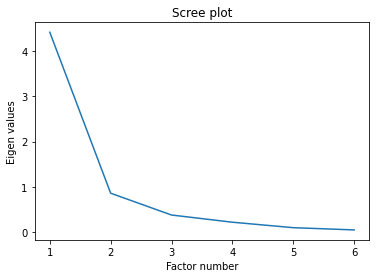

In [23]:
plt.plot(np.arange(1,p_copy+1),eigval)
plt.title("Scree plot")
plt.ylabel("Eigen values")
plt.xlabel("Factor number")
plt.show()

The graph of the cumulative variance restored according to the number of factors can also be interesting.

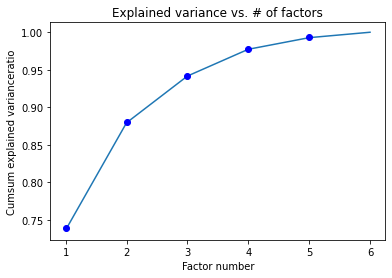

In [24]:
plt.plot(np.arange(1,p_copy+1),np.cumsum(acp.explained_variance_ratio_))
plt.plot(1, 0.74, 'bo') 
plt.plot(2, 0.88, 'bo')
plt.plot(3, 0.942, 'bo')
plt.plot(4, 0.978, 'bo')
plt.plot(5, 0.994, 'bo')   
plt.title("Explained variance vs. # of factors")
plt.ylabel("Cumsum explained varianceratio")
plt.xlabel("Factor number")
plt.show()

**Observations**

The *explained variance ratio* returns a vector of the variance explained by each dimension. So explained_variance_ratio_[i] gives the variance explained solely by the i+1st dimension. 

* We can deduce from this plot that, if we keep 2 factors (k=2, 2 dimensions), we will keep approximativly **88%** of the data that will explain an observation.
* If we keep 3 factors, we will keep approximativly **95%** of the data that will explain an observation.


### IV. How to determinate the number of factors to keep

The "breaks" in the charts above often mentioned (elbow rule) to identify the number of K * factors to keep. The solution (K * = 2) seems to prevail here.
We also could use the *"broken sticks"* test

In [25]:
# Threshold for the borken sticks test
bs = 1/np.arange(p_copy,0,-1)
bs = np.cumsum(bs)
bs = bs[::-1]

# Now let's print the values and threshold
print(pd.DataFrame({'Val.Propre':eigval, 'Seuils':bs}))

   Val.Propre  Seuils
0       4.421   2.450
1       0.856   1.450
2       0.373   0.950
3       0.214   0.617
4       0.093   0.367
5       0.043   0.167


## V. Representation of all the observations - Interpretation tool

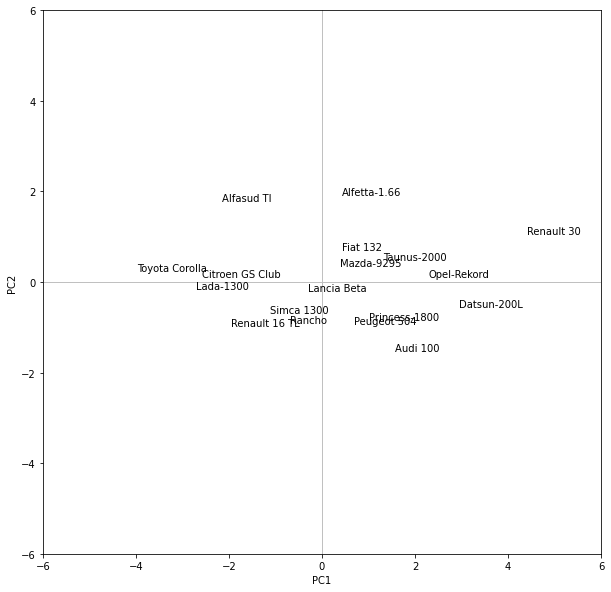

In [26]:
# positionning observations on the first plan
fig, axes = plt.subplots(figsize=(10,10))
axes.set_xlim(-6,6)
axes.set_ylim(-6,6)

# Placement of observation labels
for i in range(n):
    plt.annotate(df_copy.index[i],(coord[i,0], coord[i,1]))

# Add axes
plt.plot([-6,6],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-6,6],color='silver',linestyle='-',linewidth=1)

plt.xlabel('PC1')
plt.ylabel('PC2')

# Display
plt.show()

**Interpretation**

The main question to ask here is : What differenciates an observation with a larger x (abscisse) to another with a lower x ?
To answer that question we actually have to interprete this plot with the correlation circle which will indicate us which features have a correlation or an anti-correlation with PC1 and PC2.

But as a first approch, we could say that for example, Ranault 30 and Toyota Corolla are two observations that are opposite to each other. 

## VI. Quality of the representation - COS ² (Squared cosinus)

To calculate the quality of observation representation on the axes, we have to start to calculate the square distance to the origine from each observations which is also the total inertia contribution.

In [27]:
# contribution of the inviduals in the total inertia
di = np.sum(df_copy ** 2, axis=1)
print(pd.DataFrame({'d_i': di}))

                   d_i
Modele                
Alfasud TI       8.225
Audi 100         6.674
Simca 1300       2.159
Citroen GS Club  6.780
Fiat 132         1.169
Lancia Beta      1.135
Peugeot 504      1.513
Renault 16 TL    5.637
Renault 30      21.790
Toyota Corolla  16.290
Alfetta-1.66     4.457
Princess-1800    1.953
Datsun-200L     11.113
Taunus-2000      2.453
Rancho           1.963
Mazda-9295       0.685
Opel-Rekord      6.083
Lada-1300        7.922


In [28]:
# quality of the representation
cos2 = coord ** 2
for j in range(p_copy):
    cos2[:,j] = cos2[:,j]/di

print(pd.DataFrame({'ID': df_copy.index,'COS2_1': cos2[:,0], 'COS2_2': cos2[:,1]}))

                 ID  COS2_1  COS2_2
0        Alfasud TI   0.556   0.388
1          Audi 100   0.365   0.349
2        Simca 1300   0.580   0.211
3   Citroen GS Club   0.977   0.002
4          Fiat 132   0.157   0.414
5       Lancia Beta   0.082   0.034
6       Peugeot 504   0.309   0.575
7     Renault 16 TL   0.674   0.171
8        Renault 30   0.892   0.052
9    Toyota Corolla   0.975   0.003
10     Alfetta-1.66   0.043   0.821
11    Princess-1800   0.531   0.363
12      Datsun-200L   0.778   0.028
13      Taunus-2000   0.705   0.096
14           Rancho   0.243   0.410
15       Mazda-9295   0.217   0.185
16      Opel-Rekord   0.862   0.002
17        Lada-1300   0.926   0.003


According to theory, for each individual, the sum of COS² over all the factors is equal to 1.

In [29]:
# Checking if the théorie - sum of all the rows in cos2 = 1
print(np.sum(cos2, axis=1))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


## VII. Individuals contribution to the axes

This will help us determinate which individual has more weight for each factors's definition 

In [30]:
# Contribution to the axes
ctr = coord ** 2
for j in range(p_copy):
    ctr[:,j] = ctr[:,j]/(n*eigval[j])

print(pd.DataFrame({'id': df_copy.index, 'CTR_1':ctr[:,0], 'CTR_2':ctr[:,1]}))

                 id  CTR_1  CTR_2
0        Alfasud TI  0.057  0.207
1          Audi 100  0.031  0.151
2        Simca 1300  0.016  0.030
3   Citroen GS Club  0.083  0.001
4          Fiat 132  0.002  0.031
5       Lancia Beta  0.001  0.002
6       Peugeot 504  0.006  0.056
7     Renault 16 TL  0.048  0.062
8        Renault 30  0.244  0.073
9    Toyota Corolla  0.200  0.004
10     Alfetta-1.66  0.002  0.237
11    Princess-1800  0.013  0.046
12      Datsun-200L  0.109  0.020
13      Taunus-2000  0.022  0.015
14           Rancho  0.006  0.052
15       Mazda-9295  0.002  0.008
16      Opel-Rekord  0.066  0.001
17        Lada-1300  0.092  0.001


The ctr sum of all the rows should be equal to 1

In [31]:
print(np.sum(ctr, axis=0))

[1. 1. 1. 1. 1. 1.]


## VIII. Features representation - Interpretation tools

We need vectors for the feature analysis, we can get them with method .components_.

In [32]:
# Field components of the ACP object
print(acp.components_)

[[ 0.42493602  0.42179441  0.42145993  0.38692224  0.43051198  0.35894427]
 [ 0.12419108  0.41577389 -0.41181773 -0.446087   -0.24267581  0.6198626 ]
 [-0.35361252 -0.18492049  0.06763394  0.60486812 -0.48439601  0.48547226]
 [ 0.80778648 -0.35779199 -0.27975231  0.21156941 -0.30171136 -0.0735743 ]
 [ 0.15158003 -0.29373465  0.73056903 -0.47819008 -0.30455842  0.18865511]
 [-0.05889517 -0.63303302 -0.19029153 -0.10956624  0.5808122   0.45852167]]


In [33]:
# Square root of eigval
sqrt_eigval = np.sqrt(eigval)

# correlation between features and axes
corvar = np.zeros((p_copy, p_copy))

for k in range(p_copy):
    corvar[:,k] = acp.components_[k,:] * sqrt_eigval[k]

# print the correlation matrix features x observations
print(corvar)

[[ 0.89346354  0.1149061  -0.21598347  0.37361508  0.04617627 -0.01225391]
 [ 0.88685803  0.38468911 -0.11294784 -0.16548492 -0.08948124 -0.13171084]
 [ 0.88615477 -0.38102873  0.04131023 -0.12939024  0.22255537 -0.03959265]
 [ 0.81353638 -0.4127359   0.36944822  0.09785447 -0.14567244 -0.0227967 ]
 [ 0.90518746 -0.22453248 -0.29586489 -0.13954667 -0.09277852  0.12084561]
 [ 0.75471037  0.57351941  0.29652226 -0.03402937  0.05747056  0.09540146]]


In [34]:
# We print the 2 first axes
print(pd.DataFrame({'id':df_copy.columns,'COR_1':corvar[:,0],'COR_2':corvar[:,1]}))

      id  COR_1  COR_2
0    CYL  0.893  0.115
1  PUISS  0.887  0.385
2   LONG  0.886 -0.381
3   LARG  0.814 -0.413
4  POIDS  0.905 -0.225
5  V-MAX  0.755  0.574


Let's now plot the correlation circle

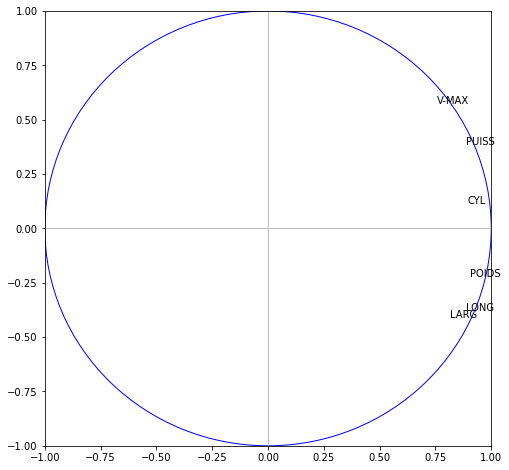

In [35]:
# circle of corrélations
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)
# print labels 
for j in range(p_copy):
    plt.annotate(df_copy.columns[j],(corvar[j,0],corvar[j,1]))
# add axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

# add the circle
circle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(circle)

plt.show()

**Interpretation**

Now that we have the correlation circle, we can see that PC1 is highly correlated with V-MAX, PUISS, CYL, POIDS, LONG and LARG. 
From this observation, going in the increasing direction of PC1 (left to right), observations have an higher chance to get a bigger value for PC1.

So at the end, walking along the PC1 axis in the right direction is like identifying faster cars, bigger cars with a big cylinder and lot of horse power.

Let's describe an outlying observation like the *Renault 30* :
* High Cylinder value
* Fast car (high value of horse power)
* High value for V-MAX
* Pretty heavy car
* Pretty long and large

We don't have the price here but we could guess it's an expansive car as well.

Let's now describe an other outlying observation but symmetrically opposite, the *Toyota Corolla* :
* Low Cylinder value
* Slow car (Low value of horse power)
* Low value for V-MAX
* Lightweight car
* Pretty small car

With those informations, we could guess that this car is affordable by most of the population (low price).


**Quality of the features representation (COS²)**

In [36]:
# squared cosinus of the features
cos2var = corvar ** 2
print(pd.DataFrame({'id':df_copy.columns,'COS2_1':cos2var[:,0],'COS2_2':cos2var[:,1]}))

      id  COS2_1  COS2_2
0    CYL   0.798   0.013
1  PUISS   0.787   0.148
2   LONG   0.785   0.145
3   LARG   0.662   0.170
4  POIDS   0.819   0.050
5  V-MAX   0.570   0.329


**Contribution of the features to the axes**

In [37]:
# contributiion
ctrvar = cos2var

for k in range(p_copy):
    ctrvar[:,k] = ctrvar[:,k]/eigval[k]

# We print only the 2 first axes
print(pd.DataFrame({'id':df_copy.columns,'CTR_1':ctrvar[:,0],'CTR_2':ctrvar[:,1]}))

      id  CTR_1  CTR_2
0    CYL  0.181  0.015
1  PUISS  0.178  0.173
2   LONG  0.178  0.170
3   LARG  0.150  0.199
4  POIDS  0.185  0.059
5  V-MAX  0.129  0.384


## IX. Illustrative observations and features processing (Optional)

In [38]:
new_observations = [
    {
        'Modele': 'Peugeot 604',
        'CYL' : 2664,
        'PUISS': 136,
        'LONG' : 472,
        'LARG': 177,
        'POIDS': 1410,
        'V-MAX': 180
    },
    {
        'Modele': 'Peugeot 304 S',
        'CYL' : 1288,
        'PUISS': 74,
        'LONG' : 157,
        'LARG': 157,
        'POIDS': 915,
        'V-MAX': 160
    }
]

new_observations_df = pd.DataFrame(new_observations)
new_observations_df = new_observations_df.set_index('Modele')

In [39]:
new_observations_df.head()

,CYL,PUISS,LONG,LARG,POIDS,V-MAX
Modele,,,,,,
Peugeot 604,2664,136,472,177,1410,180
Peugeot 304 S,1288,74,157,157,915,160


In [40]:
df2 = pd.concat([df, new_observations_df])

In [41]:
df2.head(30)

,CYL,PUISS,LONG,LARG,POIDS,V-MAX
Modele,,,,,,
Alfasud TI,1350,79,393,161,870,165
Audi 100,1588,85,468,177,1110,160
Simca 1300,1294,68,424,168,1050,152
Citroen GS Club,1222,59,412,161,930,151
Fiat 132,1585,98,439,164,1105,165
Lancia Beta,1297,82,429,169,1080,160
Peugeot 504,1796,79,449,169,1160,154
Renault 16 TL,1565,55,424,163,1010,140
Renault 30,2664,128,452,173,1320,180


In [42]:
# Scale the data with StandardScalar

df2[num_cols] = scalar.fit_transform(df2[num_cols])
print(df2)

                   CYL  PUISS   LONG   LARG  POIDS  V-MAX
Modele                                                   
Alfasud TI      -0.752 -0.347 -0.443 -0.977 -1.442  0.457
Audi 100        -0.186 -0.075  0.718  1.766  0.151  0.045
Simca 1300      -0.885 -0.846  0.037  0.223 -0.247 -0.613
Citroen GS Club -1.056 -1.254 -0.149 -0.977 -1.043 -0.695
Fiat 132        -0.193  0.515  0.269 -0.463  0.118  0.457
Lancia Beta     -0.878 -0.211  0.115  0.394 -0.048  0.045
Peugeot 504      0.309 -0.347  0.424  0.394  0.483 -0.449
Renault 16 TL   -0.240 -1.435  0.037 -0.634 -0.512 -1.601
Renault 30       2.373  1.875  0.471  1.080  1.545  1.691
Toyota Corolla  -1.189 -1.435 -0.350 -1.663 -1.807 -1.601
Alfetta-1.66    -0.229  1.013  0.099 -0.806 -0.181  1.280
Princess-1800    0.314 -0.211  0.362  0.909  0.483 -0.119
Datsun-200L      0.789  1.285  0.734  0.394  1.877  0.045
Taunus-2000      0.777  0.515  0.254  0.566 -0.048  0.621
Rancho          -0.533 -0.302  0.146 -0.120  0.277 -1.271
Mazda-9295    

In [43]:
# Projection on the factorial space
coord_sup = acp.transform(df2)
print(coord_sup)

[[-1.48722050e+00  1.01379124e+00  6.28841515e-01 -1.64615479e-01
   6.57016345e-01 -1.72678019e-01]
 [ 9.57113362e-01 -1.14659177e+00  1.14507286e+00  4.31573165e-04
  -3.63384950e-01 -1.63290588e-01]
 [-9.57119311e-01 -8.96341723e-01  4.28548798e-01 -2.55816193e-01
  -5.65017277e-03  1.31379355e-01]
 [-2.11716853e+00 -3.33028979e-01  1.71808666e-01 -2.03717408e-01
   7.53536186e-01  6.63179117e-02]
 [ 2.84346560e-01  5.40038857e-01 -1.24277046e-01 -5.82483306e-01
   2.88025232e-01 -3.69081511e-02]
 [-2.65320920e-01 -3.80125938e-01  6.40771641e-01 -5.71068087e-01
  -1.52894059e-01  1.13138356e-01]
 [ 3.63397449e-01 -8.51794017e-01 -2.29639357e-01  2.25578854e-01
   3.83024679e-02  1.52421403e-01]
 [-1.73242186e+00 -1.22665222e+00 -5.59751944e-01  4.46990741e-01
   5.69697930e-01 -4.65280636e-02]
 [ 3.68777452e+00  1.07179463e+00 -4.27950946e-01  7.52224991e-01
  -5.15237419e-01  1.38376856e-01]
 [-3.25402846e+00 -4.12017849e-01 -2.45805678e-01 -3.82941025e-02
   1.02922943e+00 -5.5598

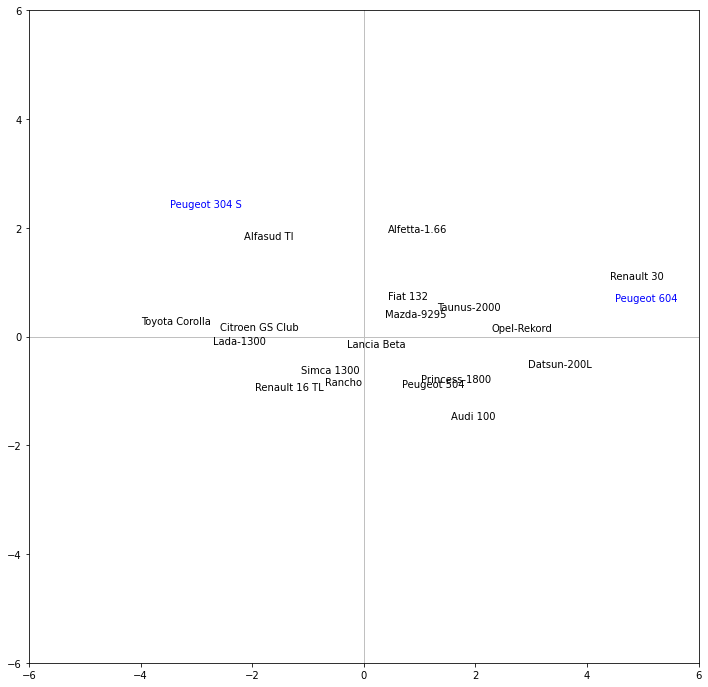

In [44]:
#positionnement des individus supplémentaires dans le premier plan
fig, axes = plt.subplots(figsize=(12,12))
axes.set_xlim(-6,6)
axes.set_ylim(-6,6)

#étiquette des points actifs
for i in range(n):
    plt.annotate(df2.index[i],(coord[i,0],coord[i,1]))

#étiquette des points supplémentaires (illustratifs)en bleu ‘b’
plt.annotate(df2.index[-1],(coord_sup[-1,0],coord_sup[-1,1]),color='b')
plt.annotate(df2.index[-2],(coord_sup[-2,0],coord_sup[-2,1]),color='b')

#ajouter les axes
plt.plot([-6,6],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-6,6],color='silver',linestyle='-',linewidth=1)

#affichage
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ee9e5ea5-15d7-436a-bb12-da478ad29584' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>